In [1]:
import subprocess
import pdb

import os
import glob
import numpy as np
from numpy.fft import fft, ifft, fftfreq
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.animation import FuncAnimation
from nilearn.plotting import view_img_on_surf, view_img
from scipy.stats import ttest_1samp

import networkx as nx
from IPython.display import HTML

# import nest_asyncio
# nest_asyncio.apply()
# import datalad.api as dl

import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")

import pandas as pd
import scipy.io
from scipy import stats

from sklearn.manifold import MDS
import scipy.spatial.distance as sp_distance
from sklearn.preprocessing import RobustScaler, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D

import time
from copy import deepcopy
import numpy as np
import pandas as pd 

from nilearn import datasets
from nilearn import surface
from nilearn import plotting
from nilearn.input_data import NiftiMasker, NiftiLabelsMasker
import nibabel as nib

from nltools.data import Brain_Data, Adjacency
from nltools.mask import expand_mask, roi_to_brain
from nltools.stats import isc, isfc, isps, fdr, threshold, phase_randomize, circle_shift, _butter_bandpass_filter, _phase_mean_angle, _phase_vector_length
from nilearn.plotting import view_img_on_surf, view_img
from sklearn.metrics import pairwise_distances
from sklearn.utils import check_random_state

# from brainiak import image, io
# from brainiak.isc import isc, isfc, permutation_isc
import matplotlib.pyplot as plt
import seaborn as sns 

from datetime import datetime as dt
from scipy.signal import hilbert, butter, filtfilt
from kuramoto import Kuramoto, plot_phase_coherence, plot_activity

%autosave 5
%matplotlib inline
sns.set(style = 'white', context='talk', font_scale=1, rc={"lines.linewidth": 2})

# %matplotlib notebook
%matplotlib inline
%autosave 5
sns.set(style = 'white', context='poster', rc={"lines.linewidth": 2.5})
sns.set(palette="colorblind")

from py3plex.core import multinet
from py3plex.core import random_generators
from py3plex.algorithms.community_detection import infomap
import numpy as np
import queue
import matplotlib.pyplot as plt
import seaborn as sns

from ts2vg import NaturalVG
from ts2vg import HorizontalVG
import pickle
from datetime import datetime
from time import time
from scipy import stats

from py3plex.core.parsers import  parse_network
from py3plex.core import multinet

import numpy as np
import pylab

from tqdm import tqdm

from multiprocess import Pool
from py3plex.algorithms.statistics.basic_statistics import core_network_statistics, identify_n_hubs

from py3plex.algorithms.community_detection import community_wrapper as cw
from py3plex.core import multinet
from py3plex.visualization.multilayer import hairball_plot, plt
from py3plex.visualization.colors import colors_default
from collections import Counter

import community as community_louvain
from py3plex.algorithms.multilayer_algorithms.entanglement import compute_entanglement_analysis



Autosaving every 5 seconds


Autosaving every 5 seconds
3.9.12 (main, Jun  1 2022, 06:36:29) 
[Clang 12.0.0 ]


In [2]:
def onetoughjar(path2dic):
    p = os.path.join(path2dic)
    list_of_files = glob.glob(p) # * means all if need specific format then *.csv
    print(list_of_files)
    latest_file = max(list_of_files, key=os.path.getctime)
    print(latest_file)
    with open(latest_file, 'rb') as pickle_file:
        try:
            while True:
                output = pickle.load(pickle_file)
        except EOFError:
            pass
    return(output)
    
    
    

In [3]:
def adillyofapickle(basepath, dic, name):
    datefmt='%m-%d-%Y_%I-%M-%S'
    st = datetime.fromtimestamp(time()).strftime(datefmt)
    if os.path.exists(os.path.join(basepath,'tmp')):
        print('already have tmp')
    else:
        os.makedirs(os.path.join(basepath,'tmp'))
    pickle.dump(dic, open(os.path.join(basepath,'tmp','%s_%s'%(name,st)), 'wb'), protocol=4)


In [4]:
datapath = '/Users/gracer/Documents/BBC_21-2939_prepro_data/derivatives/output/clamp'

In [5]:
basepath = '/Users/gracer/Documents/BBC_21-2939_prepro_data'
tasks = ['base','clamp']

savepath = os.path.join(basepath,'derivatives','output')

In [6]:
multi_nets = onetoughjar(os.path.join(savepath, 'tmp','multi_nets*'))

['/Users/gracer/Documents/BBC_21-2939_prepro_data/derivatives/output/tmp/multi_nets_06-30-2022_03-08-29', '/Users/gracer/Documents/BBC_21-2939_prepro_data/derivatives/output/tmp/multi_nets_06-30-2022_06-02-40', '/Users/gracer/Documents/BBC_21-2939_prepro_data/derivatives/output/tmp/multi_nets_06-30-2022_05-49-00']
/Users/gracer/Documents/BBC_21-2939_prepro_data/derivatives/output/tmp/multi_nets_06-30-2022_06-02-40


In [7]:
X = onetoughjar(os.path.join(savepath,'tmp','graphs_weight_dist_smz*'))

['/Users/gracer/Documents/BBC_21-2939_prepro_data/derivatives/output/tmp/graphs_weight_dist_smz_06-23-2022_05-03-32', '/Users/gracer/Documents/BBC_21-2939_prepro_data/derivatives/output/tmp/graphs_weight_dist_smz_06-23-2022_05-01-20', '/Users/gracer/Documents/BBC_21-2939_prepro_data/derivatives/output/tmp/graphs_weight_dist_smz_06-30-2022_01-27-24']
/Users/gracer/Documents/BBC_21-2939_prepro_data/derivatives/output/tmp/graphs_weight_dist_smz_06-30-2022_01-27-24


In [8]:
shapeup = {'high':
           {'20001':{},'20002':{},'20003':{},'20004':{},'20008':{},'20010':{}},
           'neu':{'20001':{},'20002':{},'20003':{},'20004':{},'20008':{},'20010':{}},
           'low':{'20001':{},'20002':{},'20003':{},'20004':{},'20008':{},'20010':{}}}

In [9]:
for z in multi_nets:
    for key, value in z.items():
        for k, v in value.items():
            for num, net in v.items():
                shapeup[k][key].update({num : net['network']})
    

In [10]:
shapeup.keys()

dict_keys(['high', 'neu', 'low'])

In [ ]:
value = shapeup['low']['20001']['1']
network_labels, graphs, multilinks = value.get_layers()

In [ ]:
G = graphs[0]
H = G.copy()

In [ ]:
rmv = {}
for node, value in G.degree():
    if value < 5:
        rmv[node] = value
        H.remove_node(node)

In [ ]:
H.nodes(data = True)

In [ ]:
X['low']['20001']['Pu'][1]['node_maps']

In [ ]:
keep

In [ ]:
keep = {}
for x,y in H.nodes(data = True):
    print('thsi is %s'%x[0])
    for k, v in X['low']['20001']['Pu'][1]['node_maps'].items():
#         print(v)
        print('this is %s'%v)
        if int(v) == int(x[0]):
            print('same!')
            keep[k] = v

In [54]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable


-------------------- 
 Network splitting in progress 
 --------------------


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 260.34it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.29  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 295.15it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.24  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 244.47it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.32  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 254.48it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.30  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 251.94it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.30  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 267.23it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.28  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 246.15it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.31  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds
Finished with layout..


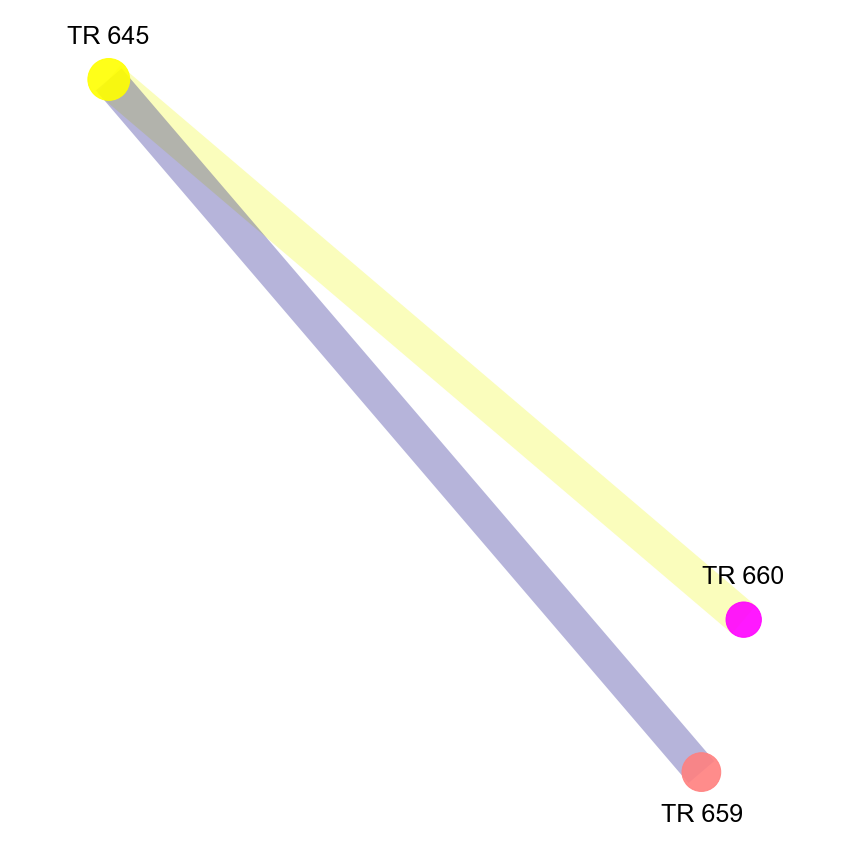

-------------------- 
 Network splitting in progress 
 --------------------


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 95.19it/s]


BarnesHut Approximation  took  0.12  seconds
Repulsion forces  took  0.83  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.05  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 102.05it/s]


BarnesHut Approximation  took  0.12  seconds
Repulsion forces  took  0.77  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.05  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 87.85it/s]


BarnesHut Approximation  took  0.11  seconds
Repulsion forces  took  0.93  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.05  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 92.95it/s]


BarnesHut Approximation  took  0.12  seconds
Repulsion forces  took  0.86  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.05  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 106.21it/s]


BarnesHut Approximation  took  0.11  seconds
Repulsion forces  took  0.73  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.05  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 90.22it/s]


BarnesHut Approximation  took  0.11  seconds
Repulsion forces  took  0.89  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.05  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 108.26it/s]


BarnesHut Approximation  took  0.11  seconds
Repulsion forces  took  0.71  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.05  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds
Finished with layout..


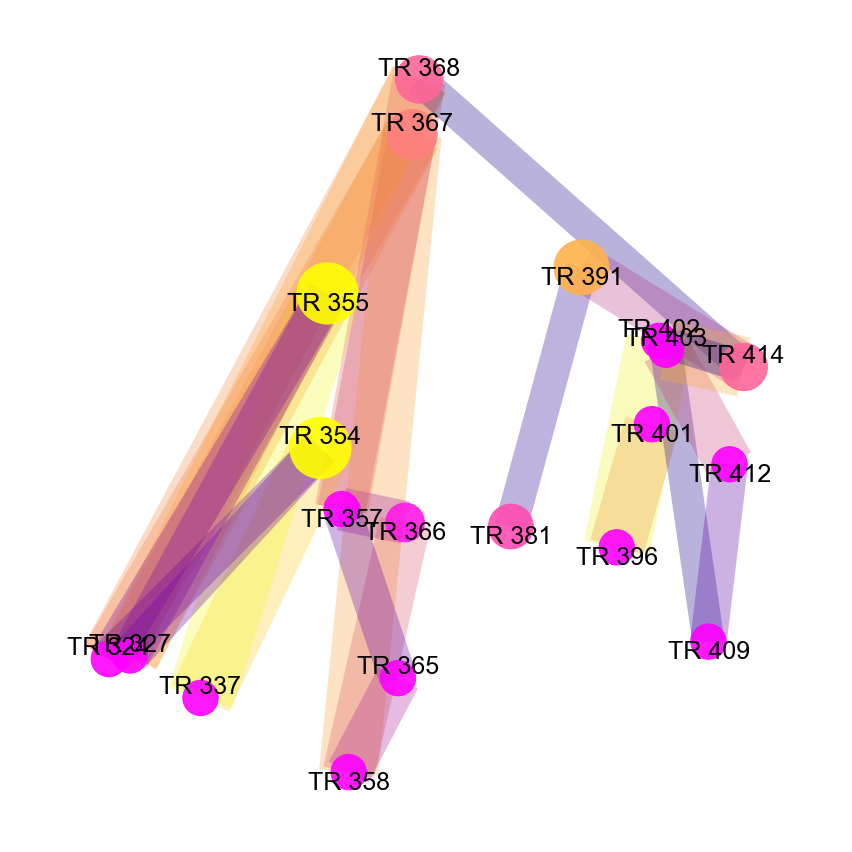

-------------------- 
 Network splitting in progress 
 --------------------


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 3699.89it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 9562.06it/s]


BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|██████████████████████████████████████| 100/100 [00:00<00:00, 13390.49it/s]


BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 5121.88it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 7147.39it/s]


BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 4699.50it/s]


BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|██████████████████████████████████████| 100/100 [00:00<00:00, 14607.17it/s]


BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds
Finished with layout..
-------------------- 
 Network splitting in progress 
 --------------------


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 147.85it/s]


BarnesHut Approximation  took  0.08  seconds
Repulsion forces  took  0.52  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.04  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 145.99it/s]


BarnesHut Approximation  took  0.08  seconds
Repulsion forces  took  0.53  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.04  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 146.97it/s]


BarnesHut Approximation  took  0.08  seconds
Repulsion forces  took  0.54  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 145.81it/s]


BarnesHut Approximation  took  0.08  seconds
Repulsion forces  took  0.54  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.04  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 132.33it/s]


BarnesHut Approximation  took  0.08  seconds
Repulsion forces  took  0.61  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 143.86it/s]


BarnesHut Approximation  took  0.08  seconds
Repulsion forces  took  0.54  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.04  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 139.70it/s]


BarnesHut Approximation  took  0.08  seconds
Repulsion forces  took  0.56  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.04  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds
Finished with layout..


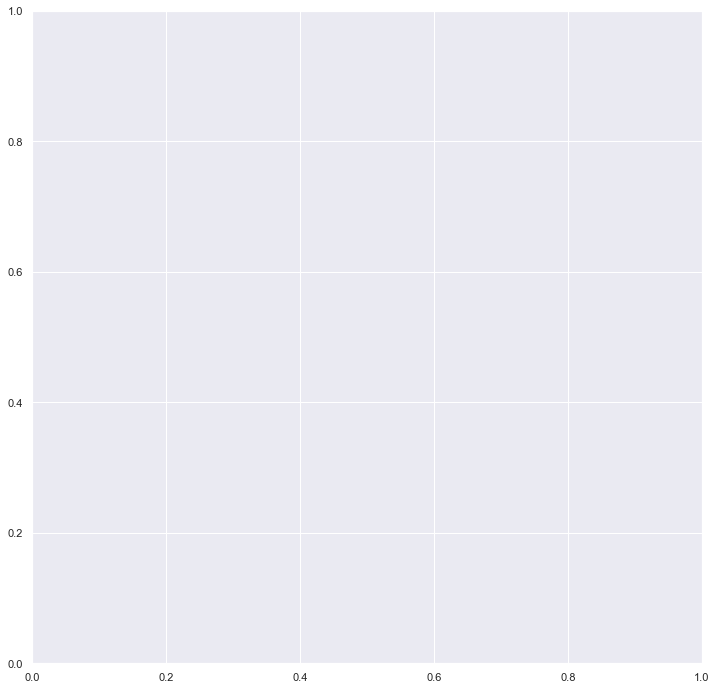

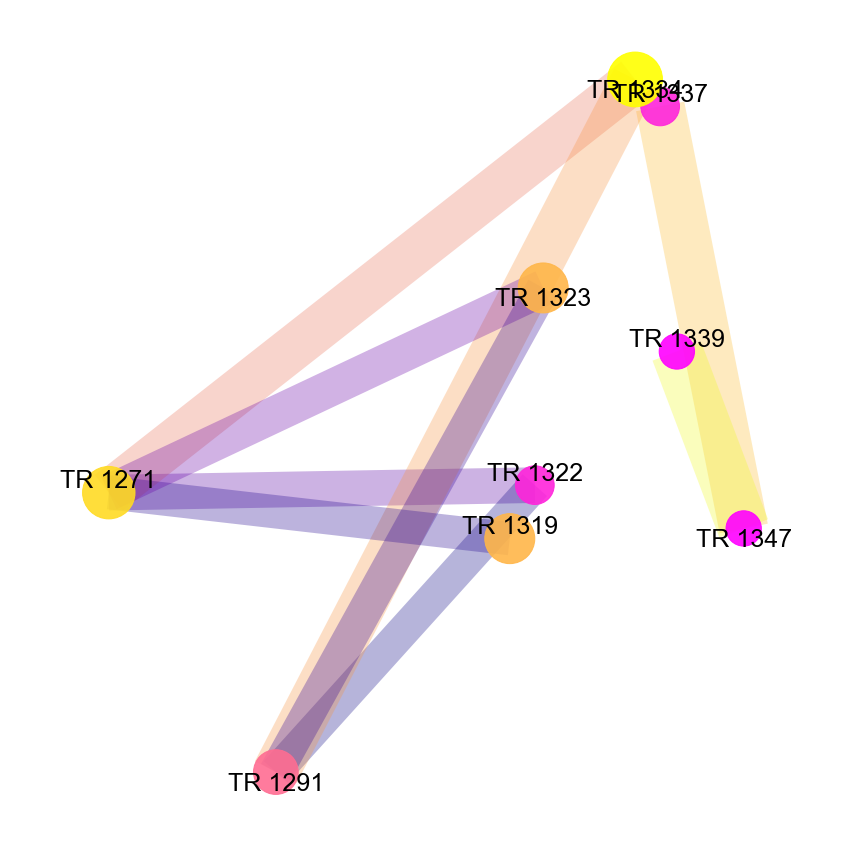

-------------------- 
 Network splitting in progress 
 --------------------


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 2547.27it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.02  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 1769.82it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.04  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 2189.44it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.03  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 3053.62it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.02  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 2273.46it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.03  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 2389.77it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.02  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 6652.03it/s]


BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds
Finished with layout..
-------------------- 
 Network splitting in progress 
 --------------------


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 254.35it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.30  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 252.20it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.30  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 228.65it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.34  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 243.50it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.32  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 254.16it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.30  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 209.95it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.38  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 233.04it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.33  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds
Finished with layout..


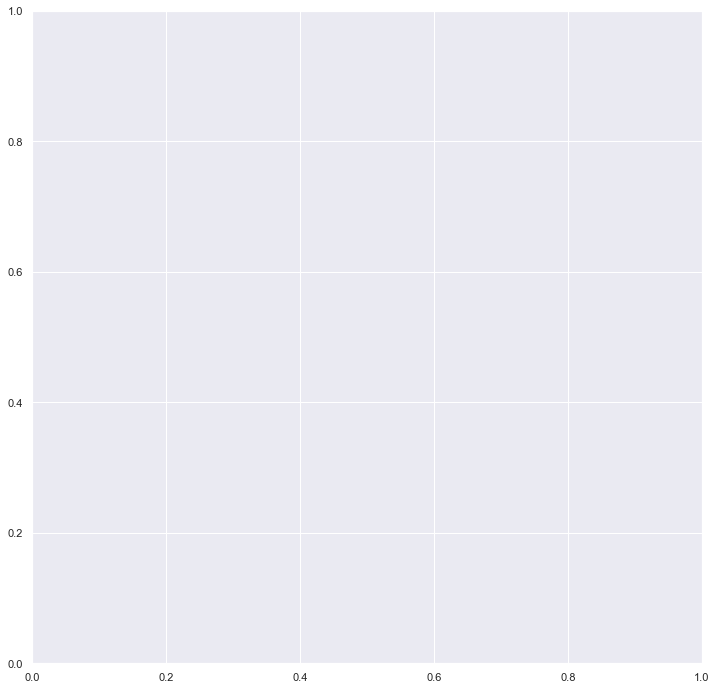

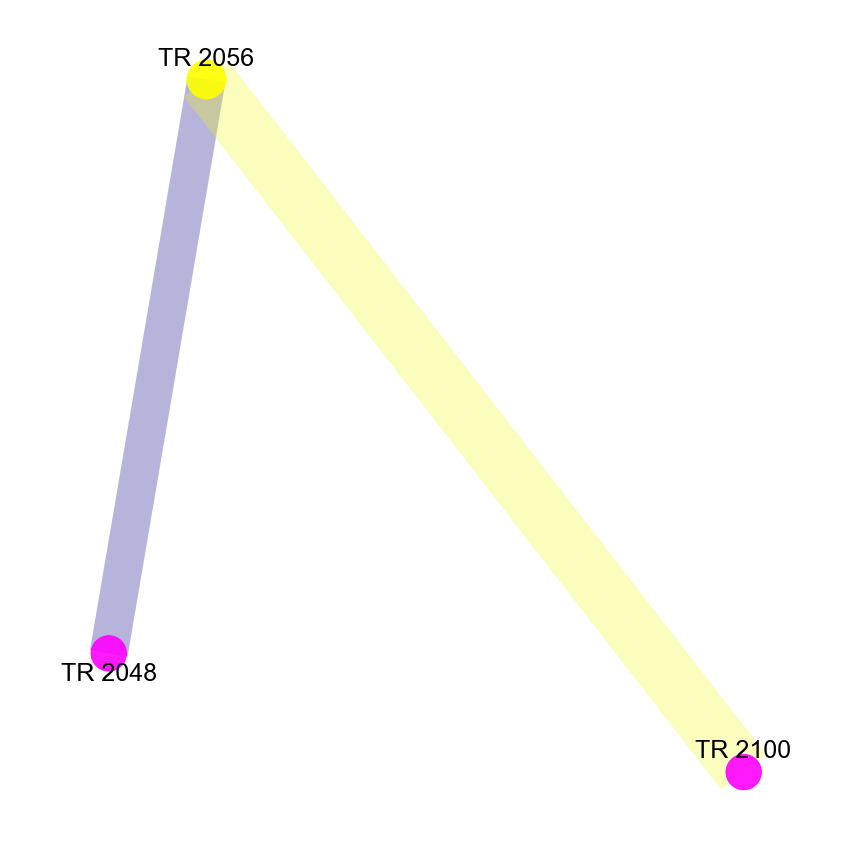

-------------------- 
 Network splitting in progress 
 --------------------


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 508.16it/s]


BarnesHut Approximation  took  0.03  seconds
Repulsion forces  took  0.14  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 523.56it/s]


BarnesHut Approximation  took  0.03  seconds
Repulsion forces  took  0.13  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 525.70it/s]


BarnesHut Approximation  took  0.03  seconds
Repulsion forces  took  0.14  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 487.69it/s]


BarnesHut Approximation  took  0.03  seconds
Repulsion forces  took  0.15  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 588.06it/s]


BarnesHut Approximation  took  0.03  seconds
Repulsion forces  took  0.12  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 507.78it/s]


BarnesHut Approximation  took  0.03  seconds
Repulsion forces  took  0.14  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 483.31it/s]


BarnesHut Approximation  took  0.03  seconds
Repulsion forces  took  0.15  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds
Finished with layout..
-------------------- 
 Network splitting in progress 
 --------------------


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 250.17it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.31  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 246.95it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.32  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 274.73it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.27  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 244.29it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.32  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 242.25it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.32  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 304.86it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.23  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 248.60it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.31  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds
Finished with layout..


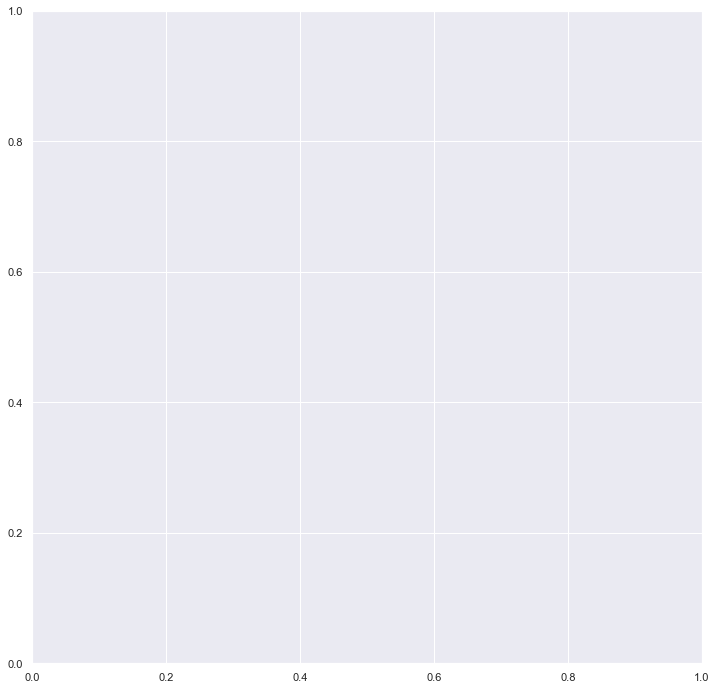

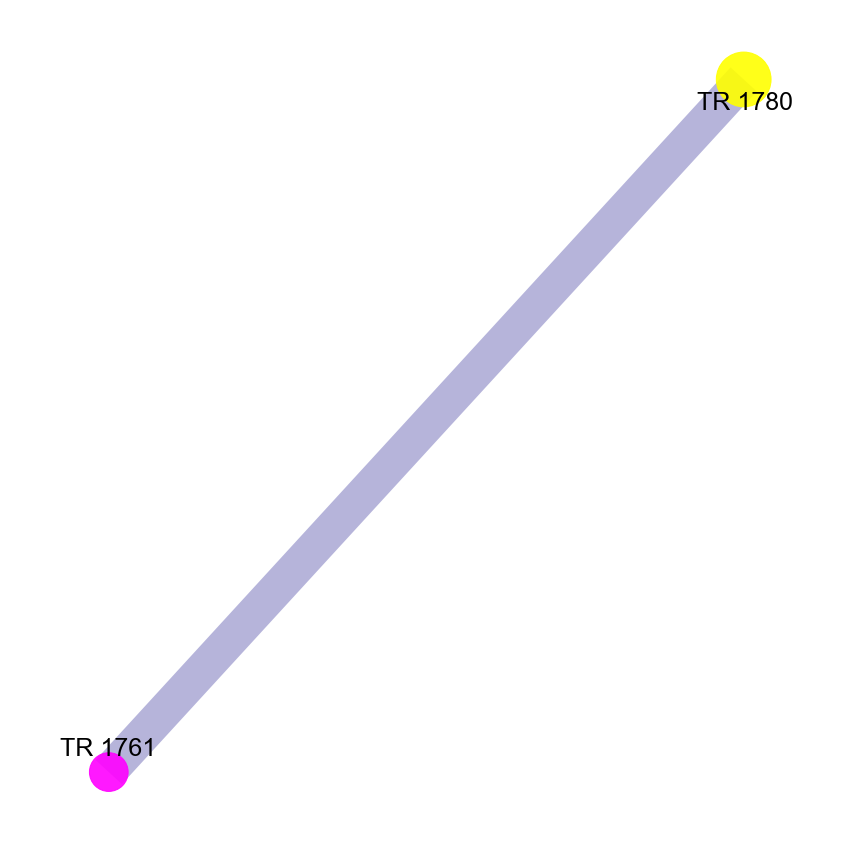

-------------------- 
 Network splitting in progress 
 --------------------


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 255.51it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.30  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 231.30it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.34  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 252.13it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.31  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 275.11it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.27  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 242.86it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.31  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 253.52it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.30  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 269.56it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.27  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds
Finished with layout..
-------------------- 
 Network splitting in progress 
 --------------------


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 284.87it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.26  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 243.30it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.32  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 242.82it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.32  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 266.14it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.28  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 243.46it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.32  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 261.56it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.29  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 257.87it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.29  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds
Finished with layout..


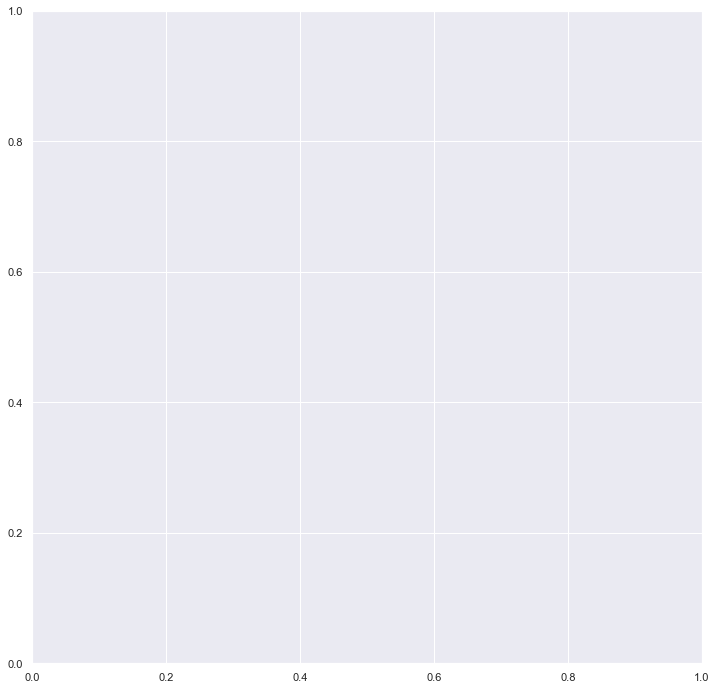

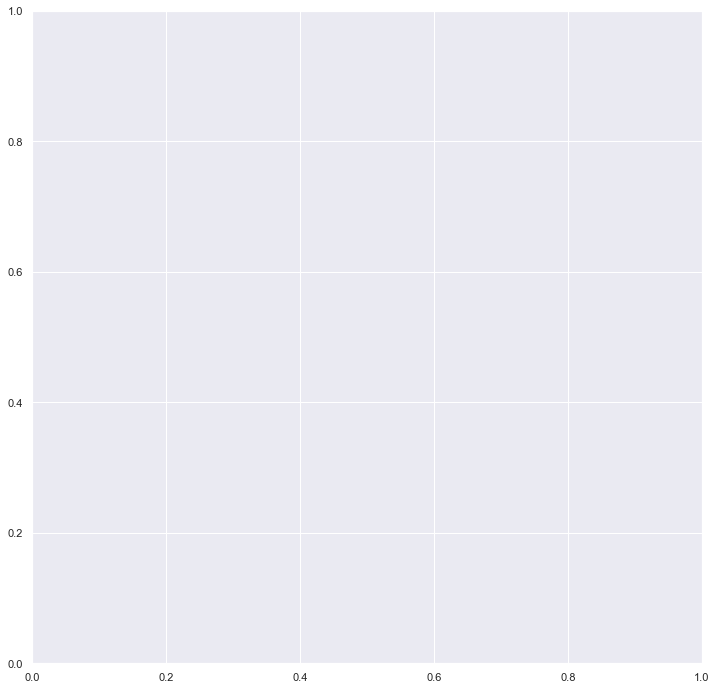

In [74]:
level = 'low'
scl = 10
for key, value in shapeup[level]['20001'].items():
    network_labels, graphs, multilinks = value.get_layers()
    G = graphs[0]
    H = G.copy()
    nodesize = {node:val*25 for (node, val) in H.degree()}
    nsz = {}
    for i, (node, value) in enumerate(G.degree()):
        if value < 5:
            H.remove_node(node) 

    edgs = []
    for edge in H.edges():
        edgs.append(edge[0][0])
        edgs.append(edge[1][0])
    
    h = H.copy()
    for x in list(H.nodes()):
        if x[0] in edgs:
#             print('here!')
            continue
        else:
            h.remove_node(x) 
    # NODE SIZE        
    for n, v in h.nodes(data = True):
        nsz[n] = nodesize[n]
    NODESIZE = list(nsz.values())
    NODESIZE2 = [i * scl for i in NODESIZE]
    node_array = np.array(NODESIZE2)
    
    
    fig, ax = plt.subplots(figsize=(12, 12))
        
    # EDGE SIZE
    edgewidth = []
    for key1,key2, value in h.edges(data = True):
        edgewidth.append(float(value['weight']))
    edgewidth2 = [i * scl for i in edgewidth]
    edge_array = np.array(edgewidth2)
        
    
    try:
        nm = X[level]['20001']['Pu'][int(key)]['node_maps']
        keep = {}
        for x,y in h.nodes(data = True):
            for k, v in nm.items():
                if int(v) == int(x[0]):
                    keep[k] = v
        ts = X[level]['20001']['Pu'][int(key)]['ts']
        test_dict = {}
        new = {}
        new_text = {}
        pos_edit = [.025,-.025]

        for i, time in keep.items():
            x = time
            y = ts[i]
            test_dict.update({('%s'%x, 'Pu'):[x,y]})
            new.update({('%s'%x, 'Pu'):[x-pos_edit[0],y+pos_edit[0]]})
            new_text.update({('%s'%x, 'Pu'):'TR %s'%x})
            pos_edit.reverse()
        try:
            edge_min = min(edge_array)
            edge_max = max(edge_array)
            edge_cmap = plt.cm.plasma
            edge_colors = list(range(round(edge_min)-1, round(edge_max)+1))
#             pdb.set_trace()

            node_min = min(node_array)
            node_max = max(node_array)
            node_cmap = plt.cm.spring
            node_colors = list(range(round(node_min)-1, round(node_max)+1))
#             pdb.set_trace()

            
            # Edges
            edges = nx.draw_networkx_edges(h, test_dict, alpha=0.3, width=edgewidth2, edge_color=edgewidth2,
                                   edge_cmap = edge_cmap, edge_vmin = edge_min, edge_vmax = edge_max)
            # Nodes
            nodes = nx.draw_networkx_nodes(h, test_dict, node_size=NODESIZE2, 
                                   node_color=NODESIZE2, 
                                   cmap = node_cmap, 
                                   vmin = node_min, 
                                   vmax = node_max,
                                   alpha=0.9)
            # Labels
            nx.draw_networkx_labels(h, pos = new, labels = new_text, font_size = 25, font_color = 'black')
            ax.margins(0.1, 0.05)
            
            fig.tight_layout()
            plt.axis("off")
            saver = os.path.join(savepath,'%s_%s_%s.png')%('20001',level, key)
            plt.savefig('%s'%saver,  transparent=True)
            plt.show()
    #         pdb.set_trace()
        except ValueError:
            continue
        
    except KeyError:
        continue

In [ ]:
from py3plex.visualization.multilayer import draw_multiedges, draw_multilayer_default, hairball_plot, plt
from py3plex.visualization import bezier

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import collections

In [ ]:
od = collections.OrderedDict(sorted(shapeup['high']['20001'].items()))

In [ ]:
od

In [ ]:
shapeup['high']['20001'].keys()

In [ ]:
G

In [ ]:
colors = ['EB3AD9','#E95F69','#A485F7','#E95F69','#5CC894','#56BEEC']


'#56BEEC','#E95F69','#E95F69','#5CC894','#A485F7','#55BA36','EB3AD9'

In [ ]:
def hex_to_RGB(hex):
    ''' "#FFFFFF" -> [255,255,255] '''
    # Pass 16 to the integer function for change of base
    return [int(hex[i:i + 2], 16) for i in range(1, 6, 2)]


In [ ]:
colors2 =[]
for color in colors:
    colors2.append(hex_to_RGB(color))

In [ ]:
colors2

In [ ]:
Circle((1 + 1,
                    1 + 1),
                   10,
                   color='#56BEEC',
                   alpha=0)
plt.show()

In [ ]:
import numpy as np
import networkx as nx
try:
    from matplotlib.patches import Rectangle
    from matplotlib.patches import Circle
except:
    pass

import random

import matplotlib.pyplot as plt

from py3plex.visualization import colors  # those are color ranges
from py3plex.visualization import bezier  # those are bezier curves
from py3plex.visualization import polyfit
from py3plex.visualization.layout_algorithms import compute_force_directed_layout, compute_random_layout
from py3plex.visualization import drawing_machinery

try:
    import plotly.graph_objects as go
    plotly_import = True
    
except:
    plotly_import = False
def test_draw_multilayer_default(network_list,
                            display=True,
                            node_size=10,
                            alphalevel=0.13,
                            rectanglex=1,
                            rectangley=1,
                            background_shape="circle",
                            background_color="rainbow",
                            networks_color="rainbow",
                            labels=False,
                            arrowsize=0.5,
                            label_position=1,
                            verbose=False,
                            remove_isolated_nodes=False,
                            axis=None,
                            edge_size=1,
                            node_labels=False,
                            node_font_size=5,
                            scale_by_size=False):

    
    """Core multilayer drawing method
    Args:
    network_list (list): a list of networks
    display (bool): Whether to display or not (directly)
    node_size (int): size of the nodes
    alphalevel (float): transparency level
    rectanglex (float): size of rectangles (background) (horizontal part)
    rectangley (float): size of vertical parts of rectangles
    background_shape (string): Background shape, either circle or rectangle
    background_color (string): Background color
    networks_color (string): Color of individual networks
    labels (bool): Display labels?
    arrowsize (float): Sizes of individual arrows
    label_position (int): position of labels  (diagonal right)
    verbose (bool): Verbose printout?
    remove_isolated_nodes (bool): Remove isolated nodes?
    axis (bools): axis are displayed
    edge_size (float): Size of edges
    node_labels (bool): Display node labels?
    node_font_size (int): Size of the font
    scale_by_size (bool): Scale nodes according to their degrees?
    Returns:
        None
    """
#    main_figure = plt.figure()
#    shape_subplot = main_figure.add_subplot(111)

    shape_subplot = plt.gca()
    facecolor_list_background = ['#EB3AD9','#E95F69','#A485F7','#E95F69','#5CC894','#56BEEC']*20
    alphalevel = 0
       

    
    facecolor_list = ['#EB3AD9','#E95F69','#A485F7','#E95F69','#5CC894','#56BEEC']*20
        

    start_location_network = 0
    start_location_background = 0
    color = 0
    shadow_size = 0.5
    circle_size = 1.05

    for network in network_list:
        if remove_isolated_nodes:
            isolates = list(nx.isolates(network))
            network = network.copy()
            network.remove_nodes_from(isolates)

        if verbose:
            print(nx.info(network))
        degrees = dict(nx.degree(nx.Graph(network)))
        cntr = 0
        cntr_all = 0
        no_position = []
        all_positions = []
        for node in network.nodes(data=True):
            if 'pos' not in node[1]:
                no_position.append(node[0])
                cntr += 1
            else:
                all_positions.append(node[1]['pos'])
                cntr_all += 1

        if len(no_position) > 0:
            network = network.copy()
            network.remove_nodes_from(no_position)

        positions = nx.get_node_attributes(network, 'pos')
        cntr = 0

        for node, position in positions.items():
            position += start_location_network

        # this is the default delay for matplotlib canvas
        if labels != False:
            try:
                plt.text(start_location_network + label_position,
                                   start_location_network - label_position,
                                   labels[color])
            except Exception as es:                
                print(es)
        
        print(facecolor_list_background[color])

        shape_subplot.add_patch(
            Circle((start_location_background + shadow_size,
                    start_location_background + shadow_size),
                   circle_size,
                   color=facecolor_list_background[color],
                   alpha=alphalevel))
        color = color+1
        

        start_location_network += 1.5
        start_location_background += 1.5
        # if len(network.nodes()) > 10000:
        #     correction=10
        # else:
        #     correction = 1

        if scale_by_size:
            node_sizes = [vx * node_size for vx in degrees.values()]
        else:
            node_sizes = [node_size for vx in degrees.values()]

        if np.sum(node_sizes) == 0:
            node_sizes = [node_size for vx in degrees.values()]



        drawing_machinery.draw(network,
                               positions,
                               node_color='black',
                               with_labels=node_labels,
                               edge_size=edge_size,
                               node_size=node_sizes,
                               arrowsize=arrowsize,
                               ax=axis,
                               font_size=node_font_size)


    if display == True:
        plt.show()

In [ ]:
def test_draw_multiedges(network_list,
                    multi_edge_tuple,
                    input_type="nodes",
                    linepoints="-.",
                    alphachannel=0.3,
                    linecolor="black",
                    curve_height=1,
                    style="curve2_bezier",
                    linewidth=1,
                    invert=False,
                    linmod="both",
                    resolution=0.001):
    # indices are correct network positions
#    main_figure = plt.figure()
#    shape_subplot = main_figure.add_subplot(111)
    
    if input_type == "nodes":

        network_positions = [
            nx.get_node_attributes(network, 'pos') for network in network_list
        ]

        global_positions = {}
        for position in network_positions:
            for k, v in position.items():
                global_positions[k] = v

        for pair in multi_edge_tuple:
            try:

                coordinates_node_first = global_positions[pair[0]]
                coordinates_node_second = global_positions[pair[1]]
                color = int(float(pair[2]['weight']))

                p1 = [coordinates_node_first[0], coordinates_node_second[0]]
                #[coordinates_node_first[0], coordinates_node_first[1]]
                p2 = [coordinates_node_first[1],
                      coordinates_node_second[1]]  # []

                if style == "line":

                    plt.plot(p1,
                             p2,
                             linestyle=linepoints,
                             lw=1,
                             alpha=alphachannel,
                             color=linecolor)

                elif style == "curve2_bezier":

                    x, y = bezier.draw_bezier(len(network_list),
                                              p1,
                                              p2,
                                              path_height=curve_height,
                                              inversion=invert,
                                              linemode=linmod,
                                              resolution=resolution)
                    if int(float(pair[2]['weight'])) >= 7:
                        c = test['hex'][color]

                        plt.plot(x,
                                 y,
                                 linestyle=linepoints,
                                 lw=linewidth,
                                 alpha=alphachannel,
                                 color=c)

                elif style == "curve3_bezier":

                    x, y = bezier.draw_bezier(len(network_list),
                                              p1,
                                              p2,
                                              mode="cubic",
                                              resolution=resolution)

                elif style == "curve3_fit":

                    x, y = polyfit.draw_order3(len(network_list), p1, p2)

                    plt.plot(x, y)

                elif style == "piramidal":

                    x, y = polyfit.draw_piramidal(len(network_list), p1, p2)
                    plt.plot(x,
                             y,
                             linestyle=linepoints,
                             lw=1,
                             alpha=alphachannel,
                             color=linecolor)

                else:
                    pass

            except Exception as err:
                pass


In [ ]:
def test_visualize_network(self,
                          sub = False,
                          ROI = False,
                            i = False,
                          style="diagonal",
                          parameters_layers=None,
                          parameters_multiedges=None,
                          show=False,
                          compute_layouts="force",
                          layouts_parameters=None,
                          verbose=True,
                          orientation="upper",
                          resolution=0.01,
                          axis=None,
                          fig=None,
                          no_labels=False,
                          linewidth=1.7,
                          alphachannel=0.3,
                          linepoints="-.",
                          legend=False):
#         if server_mode:
#             return 0
        """ 
        network visualization.
        Either use diagonal or hairball style. Additional parameters are added with parameters_layers and parameters_edges etc.
        """

        if style == "diagonal":
            network_labels, graphs, multilinks = self.get_layers(style)
            if no_labels:
                network_labels = None
            if parameters_layers is None:
                if axis:
                    axis = draw_multilayer_default(graphs,
                                                   display=False,
                                                   background_shape="circle",
                                                   labels=network_labels,
                                                   node_size=3,
                                                   verbose=verbose)
                else:
                    ax = test_draw_multilayer_default(graphs,
                                                 display=False,
                                                 background_shape="circle",
                                                 labels=network_labels,
                                                 node_size=3,
                                                 verbose=verbose)
            else:
                if axis:
                    axis = draw_multilayer_default(graphs, **parameters_layers)
                else:
                    ax = test_draw_multilayer_default(graphs, **parameters_layers)

            if parameters_multiedges is None:
                enum = 1
                for edge_type, edges in multilinks.items():
                    if edge_type == "coupling":
                        if axis:
                            axis = draw_multiedges(graphs,
                                                   edges,
                                                   alphachannel=alphachannel,
                                                   linepoints=linepoints,
                                                   linecolor="red",
                                                   curve_height=2,
                                                   linmod="bottom",
                                                   linewidth=linewidth,
                                                   resolution=resolution)
                        else:
                            ax = draw_multiedges(graphs,
                                                 edges,
                                                 alphachannel=alphachannel,
                                                 linepoints=linepoints,
                                                 linecolor="red",
                                                 curve_height=2,
                                                 linmod="bottom",
                                                 linewidth=linewidth,
                                                 resolution=resolution)
                    else:
                        if axis:
                            axis = draw_multiedges(graphs,
                                                   edges,
                                                   alphachannel=alphachannel,
                                                   linepoints="--",
                                                   linecolor="black",
                                                   curve_height=2,
                                                   linmod=orientation,
                                                   linewidth=linewidth,
                                                   resolution=resolution)
                        else:
                            ax = test_draw_multiedges(graphs,
                                                 edges,
                                                 alphachannel=alphachannel,
                                                 linepoints="--",
                                                 linecolor="black",
                                                 curve_height=2,
                                                 linmod=orientation,
                                                 linewidth=linewidth,
                                                 resolution=resolution)
                    enum += 1
            
            else:
                enum = 1
                for edge_type, edges in multilinks.items():
                    if axis:
                        axis = draw_multiedges(graphs, edges,
                                               **parameters_multiedges)
                    else:
                        ax = draw_multiedges(graphs, edges,
                                             **parameters_multiedges)
                    enum += 1
            if show:
                saver = os.path.join(savepath,'test%s_%s_%s.png'%(sub,ROI,  i))
                plt.savefig('%s'%saver,  transparent=True)
                plt.show()
                

            if axis:
                return axis
                saver = os.path.join(savepath,'test%s_%s_%s.png'%(sub,ROI,  i))
                plt.savefig('%s'%saver,  transparent=True)
            else:
                return ax
                saver = os.path.join(savepath,'test%s_%s_%s.png'%(sub, ROI,  i))
                plt.savefig('%s'%saver,  transparent=True)

        
                
        else:
            raise Exception(
                "Please, specify visualization style using: .style. keyword")


In [ ]:
od = collections.OrderedDict(sorted(shapeup['low']['20001'].items()))

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]

for i, G in od.items():
    print(i)
    test_visualize_network(G,sub = 'sub-20001',
                          ROI = 'low',
                            i = i,
                          style="diagonal",
                          parameters_layers={'scale_by_size':True, 
                                             'display':True, 
                                             'labels':network_labels, 
                                             "remove_isolated_nodes":True,
                                            "background_color":'cust',
                            "networks_color":'cust'},
                          parameters_multiedges=None,
                          show=True,
                          compute_layouts="force",
                          layouts_parameters=None,
                          verbose=True,
                          orientation="upper",
                          resolution=0.01,
                          axis=None,
                          fig=None,
                          no_labels=False,
                          linewidth=1.7,
                          alphachannel=0.3,
                          linepoints="-.",
                          legend=False)

In [ ]:
G = graphs[1]

In [ ]:
G

In [ ]:
X = onetoughjar(os.path.join(savepath,'tmp','graphs_weight_dist_smz*'))

In [ ]:
G.nodes(data = True)[('2340', 'Ca')]

In [ ]:
X['low']['20001']['Ca'][8]

In [ ]:
X['low']['20001']['Ca'][1].keys()

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.approximation as nx_app
import math
pos = nx.get_node_attributes(G, "pos")

# Depot should be at (0,0)
#pos[0] = (0.5, 0.5)

keepX = [0]*len(pos)
keepY = [0]*len(pos)
keepDist = []
for i, (key, value) in enumerate(pos.items()):
    print(i)
    if i == 0:
        keepX[i] = value[0]
        keepY[i] = value[1]
    else:
        keepX[i] = value[0]
        keepY[i] = value[1]
        dist = math.hypot(keepX[i-1] - keepX[i], keepY[i-1] - keepY[i])
        keepDist.append(dist)
        H.add_edge(i-1, i, weight=dist)

# H = G.copy()

pos.keys()

In [ ]:
pos

In [ ]:
H.edges(data = True)

In [ ]:
pos

In [ ]:
H.nodes(data = True)

In [ ]:
rmv = []
for node, X in H.nodes(data = True):
#     print(len(X['pos']))
    try:
        if len(X['pos']) < 2:
            rmv.append(node)
    except KeyError:
        rmv.append(node)
        

In [ ]:
for node in rmv:
    H.remove_node(node)

In [ ]:
G.add_node(1,pos=(1,1))

In [ ]:
H.nodes(data = True)

In [ ]:
nx.draw_networkx(
    H,
    pos,
    with_labels=True,
    edge_color="red",
    node_size=200,
    width=3,
)

In [ ]:
H.edges(data = True)

In [ ]:
pos.values()

In [ ]:
G = nx.random_geometric_graph(20, radius=0.4, seed=3)
pos = nx.get_node_attributes(G, "pos")

In [ ]:
pos

In [ ]:
for x, y in pos.items():
    print(y)

In [ ]:
pos.keys()

In [ ]:
len(pos)

In [ ]:
network_labels

In [ ]:
test={'hex':['#F5F5DC','#F5F5DC','#F5F5DC','#FFB6C1','#32CD32','#9370DB','#FF0000','#40E0D0']}